# Responding to a few review comments here:

## Looking into our choice to use these 91 mutations
Key question: Are mutations less likely to have a fitness effect in our experiment here than in the BYxRM clones?

In [1]:
from plotting_loading import *

/net/fs-desai01/srv/export/desai_lab/share/users/mjohnson/VTn/VTn_pipeline/Analysis/plotting_loading.py:71: RuntimeWarning: Mean of empty slice
  anc_s[cond][edge] = np.nanmean(td['s'])
/net/fs-desai01/srv/export/desai_lab/share/users/mjohnson/VTn/VTn_pipeline/Analysis/plotting_loading.py:82: RuntimeWarning: Mean of empty slice
  anc_s_clones[cond][edge] = np.nanmean(td['s'])


Text(0, 0.5, 'Frequency')

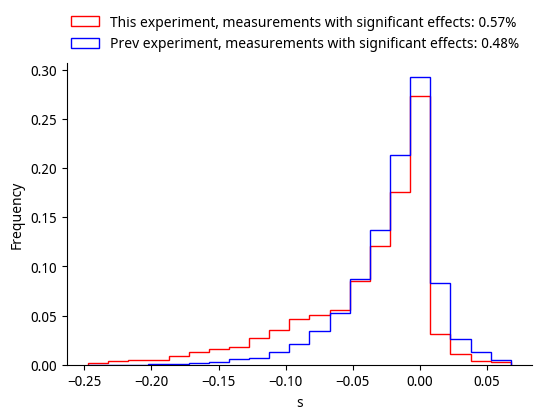

In [2]:
bin_lefts = [(-16.15+i)*0.015-0.005 for i in range(22)]
sn = [i for i in vtn_s['s'] if pd.notnull(i)]
so = [i for i in byrm_s['s'] if pd.notnull(i)]
f = pl.figure(dpi=100)
pl.hist(sn, bins=bin_lefts, label=f'This experiment, measurements with significant effects: {len(vtn_s[vtn_s.sig])/len(vtn_s):.2f}%', histtype="step", color="r", weights=np.ones_like(sn)/float(len(sn)))
pl.hist(so, bins=bin_lefts, label=f'Prev experiment, measurements with significant effects: {len(byrm_s[byrm_s.sig])/len(byrm_s):.2f}%', histtype="step", color="b", weights=np.ones_like(so)/float(len(so)))
sns.despine()
pl.legend(bbox_to_anchor=(1, 1.2), frameon=False)
pl.xlabel('s')
pl.ylabel('Frequency')

In [3]:
len(byrm_s), len(byrm_s[byrm_s.sig]), len(vtn_s), len(vtn_s[vtn_s.sig]), len(byrm_s[byrm_s.sig])/len(byrm_s), len(vtn_s[vtn_s.sig])/len(vtn_s)

(11751, 5695, 9329, 5279, 0.4846396051399881, 0.565869868153071)

### Conclusions: 
* The 91 mutations studied here are approximately as likely to have fitness effects in this set of clones. While we are certainly only sampling a small number of the total possible mutations, this set of mutations once again maximizes our signal and let's us study interesting cases of epistasis that we wouldn't be able to detect using a large panel of mutations (given limited resources)
* Since our strain background (W303) is fairly similar to one of the parents in the cross (BY), this makes sense!

## What is the rationale underlying the choice of 0.05 for slope cutoff?

In [4]:
conditions = ['P1_YPD_30C', 'P3_SC_37C', 'P1_SC_37C']
for cond in conditions:
    td = vtn_s[vtn_s.Cond==cond]
    print(cond)
    print('Mean standard error of s measurement:', np.mean(td['stderr']))
    print('Fitness range:', np.max(td['Fitness'])-np.min(td['Fitness']))
    print('change in s for a 0.05 slope:', (np.max(td['Fitness'])-np.min(td['Fitness']))*0.05)

P1_YPD_30C
Mean standard error of s measurement: 0.007254164751948623
Fitness range: 0.15283892638401125
change in s for a 0.05 slope: 0.007641946319200563
P3_SC_37C
Mean standard error of s measurement: 0.008855846351425724
Fitness range: 0.2804267013604591
change in s for a 0.05 slope: 0.014021335068022956
P1_SC_37C
Mean standard error of s measurement: 0.009796115665321606
Fitness range: 0.5241913642782062
change in s for a 0.05 slope: 0.026209568213910312


### Conclusion:
* In YPD 30C, a mutation with a 0.05 slope will change it's fitness effect by about the mean standard error of our fitness effect measurements, so the entire effect is about in the range of our measurement error. In SC 37C this is a more conservative cutoff, but we will apply it across conditions for consistency